In [1]:
# install custom ripser
!git clone https://github.com/ggrindstaff/ripser.py
%cd ripser.py
!pip install -e .

fatal: destination path 'ripser.py' already exists and is not an empty directory.
/Volumes/Seagate One Touch HDD Media/Berm_tiffs/ripser.py
Obtaining file:///Volumes/Seagate%20One%20Touch%20HDD%20Media/Berm_tiffs/ripser.py
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ripser (pyproject.toml) ... done
  Created wheel for ripser: filename=ripser-0.6.2-0.editable-cp39-cp39-macosx_11_0_arm64.whl size=6031 sha256=7ab176470ea4efe269711e67818c367ce388870f9b28319e6bf318d28d07b327
  Stored in directory: /private/var/folders/9h/qhym8j_x3vlby3c3j9klp0vc0000gn/T/pip-ephem-wheel-cache-x7tpes6b/wheels/ba/f9/af/09e9d023e461a23b1923d22144d2b42c0235d9657e75e24258
Successfully built ripser
  Attempting uninstall: ripser
    Found existing installation: ripser 0.6.2
    Uninstalling ripser-0.6.2:
      Successfully uninst

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
from matplotlib.transforms import Affine2D
import scipy
from scipy import ndimage
import PIL
import random
!pip install geopandas
import geopandas as gpd
import pandas as pd


from persim import plot_diagrams, bottleneck, sliced_wasserstein, wasserstein, bottleneck_matching, PersImage,PersistenceImager, landscapes
from ripser import ripser, lower_star_img, Rips
from persim.persistent_entropy import *
from scipy import stats
from scipy import sparse


plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline 

/Users/danalapides/opt/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [3]:
def img_to_sparse(img):
  # Modified from source code
    m, n = img.shape

    idxs = np.arange(m * n).reshape((m, n))

    I = idxs.flatten()
    J = idxs.flatten()
    V = img.flatten()

    # Connect 8 spatial neighbors
    tidxs = np.ones((m + 2, n + 2), dtype=np.int64) * np.nan
    tidxs[1:-1, 1:-1] = idxs

    tD = np.ones_like(tidxs) * np.nan
    tD[1:-1, 1:-1] = img

    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:

            if di == 0 and dj == 0:
                continue

            thisJ = np.roll(np.roll(tidxs, di, axis=0), dj, axis=1)
            thisD = np.roll(np.roll(tD, di, axis=0), dj, axis=1)
            thisD = np.maximum(thisD, tD)

            # Deal with boundaries
            boundary = ~np.isnan(thisD)
            thisI = tidxs[boundary]
            thisJ = thisJ[boundary]
            thisD = thisD[boundary]

            I = np.concatenate((I, thisI.flatten()))
            J = np.concatenate((J, thisJ.flatten()))
            V = np.concatenate((V, thisD.flatten()))

    return sparse.coo_matrix((V, (I, J)), shape=(idxs.size, idxs.size))


def cocycles_to_plot(cocycles,d,rotate=False):
  m,n = d.shape
  birthloc = [cocycles[0][i][0][0] for i in range(len(cocycles[0]))]
  # persistence = [cocycles[0][i][0][1]-cocycles[0][i][0][0] for i in range(len(cocycles[0]))]
  xloc = []
  yloc = []
  for ind in birthloc:
    if rotate==False:
      yi = int(ind/n)
      xi = ind%n
    if rotate==True:
      yi = m-int(ind/n)-1
      xi = ind%n  
    xloc.append(xi)
    yloc.append(yi)
  return xloc,yloc


In [4]:
files = ['AOI2_1m_DEM.csv',
         'AOI3_1m_DEM.csv',
#          'AOI4_1m_DEM.csv',
         'AOI5_1m_DEM.csv',
         'DEM_simplesite.csv']

N=len(files)

import scipy.ndimage

dgm0 = {i:[] for i in range(N)} # output 0th homology data
dgm0_adj= {i:[] for i in range(N)} # output 0th homology data
dgm1 = {i:[] for i in range(N)} # output 1th homology data
data = {i:[] for i in range(N)} # DEM data for examples
data2 = {i:[] for i in range(N)} # DEM data with noise for examples
cocycles = {i:[] for i in range(N)}

for i in range(N):
    f = files[i]

    data[i] = pd.read_csv('/Volumes/Seagate One Touch HDD Media/Berm_tiffs/'+f,header=None).to_numpy()
    d = data[i]
    if i==4:
        d = d - np.nanmin(d.flatten())

    # plt.imshow(d)
    data2[i] = d + 0.00001*np.random.rand(d.shape[0],d.shape[1])

    sparseDM = img_to_sparse(data2[i])
    rip = ripser(-sparseDM, distance_matrix=True, maxdim=0, do_cocycles=True)
    dgm0[i] = rip["dgms"][0]
    cocycles[i] = rip["cocycles"]
 

In [5]:
def cocycles_to_plot(cocycles,d,rotate=False):
  m,n = d.shape
  birthloc = [cocycles[0][i][0][0] for i in range(len(cocycles[0]))]
  xloc = []
  yloc = []
  for ind in birthloc:
    if rotate==False:
      yi = int(ind/n)
      xi = ind%n
    if rotate==True:
      yi = m-int(ind/n)-1
      xi = ind%n  
    xloc.append(xi)
    yloc.append(yi)
  return xloc,yloc

0
drawing detected berms...


/var/folders/9h/qhym8j_x3vlby3c3j9klp0vc0000gn/T/ipykernel_79704/328619867.py:155: RuntimeWarning: divide by zero encountered in double_scalars
  heightratio = persheight / meanheight
/var/folders/9h/qhym8j_x3vlby3c3j9klp0vc0000gn/T/ipykernel_79704/328619867.py:164: RuntimeWarning: divide by zero encountered in double_scalars
  feature_width = feature_size / feature_length


drawing persistence diagram...
1
drawing detected berms...
drawing persistence diagram...
2
drawing detected berms...
drawing persistence diagram...
3
drawing detected berms...
drawing persistence diagram...


/var/folders/9h/qhym8j_x3vlby3c3j9klp0vc0000gn/T/ipykernel_79704/328619867.py:254: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig('/Users/danalapides/Documents/Jupyter/berms/all_results.png',
/var/folders/9h/qhym8j_x3vlby3c3j9klp0vc0000gn/T/ipykernel_79704/328619867.py:254: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('/Users/danalapides/Documents/Jupyter/berms/all_results.png',


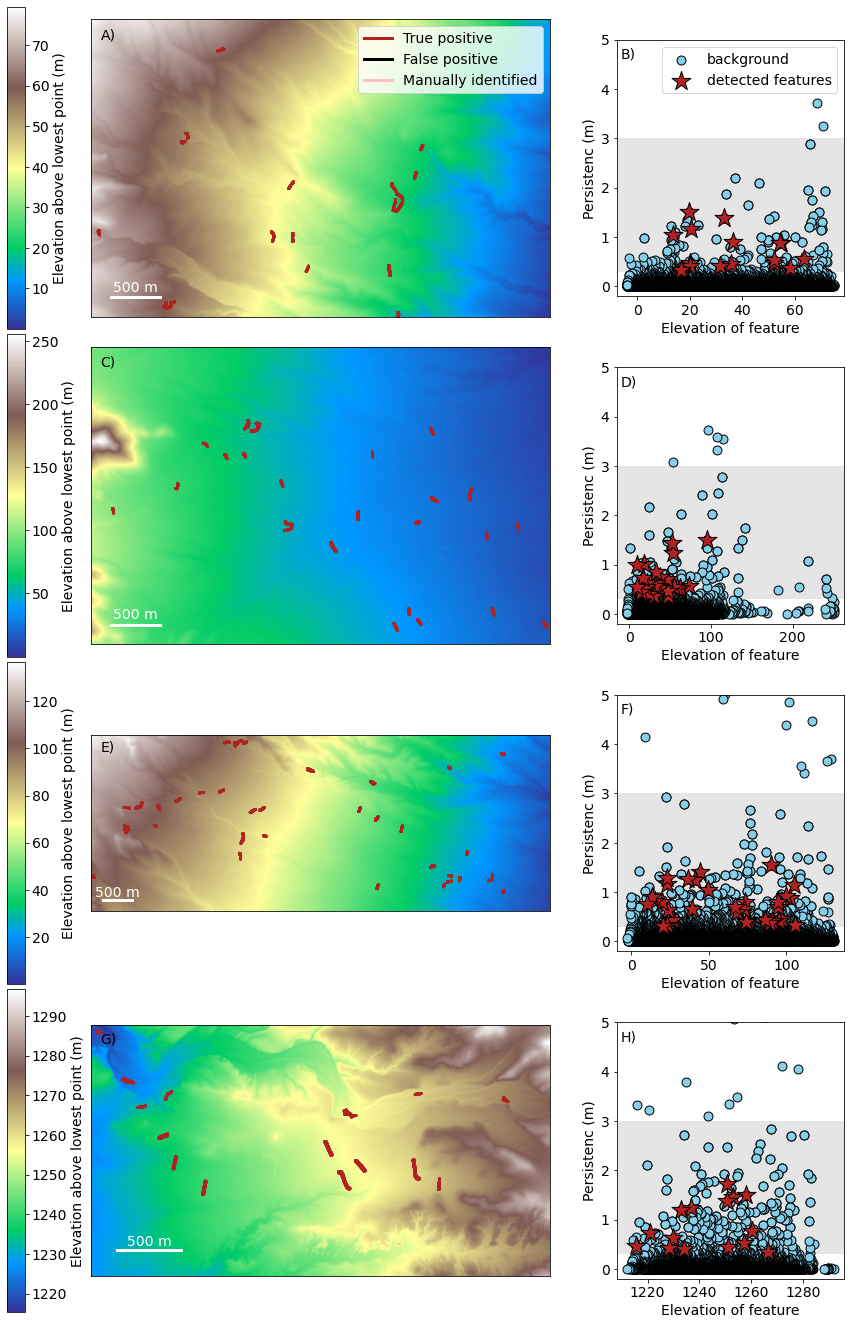

In [10]:
# plot cycle locations on DEM data
from scipy.spatial.distance import pdist, squareform
from skimage import measure
from skimage import filters
# plot cycle locations on DEM data
import matplotlib.gridspec as gridspec
from matplotlib.patches import ConnectionPatch


plt.rcParams.update({'font.size': 14})



thresh = 0.3 #these should be the min and max height that a berm would be relative to its surroundings
thresh1 = thresh
max_thresh = 3
noisethresh = 7
xvals_all = []
yvals_all = []

minsize = 200
maxsize = 2000
maxsize_stockpond = 2000
minlength = 40
maxlength = 250
maxwidth = 15
minhratio = 1.
maxhratio = 5.

fig = plt.figure(constrained_layout=True, figsize = (15,24))
spec = gridspec.GridSpec(ncols=40, nrows=40, figure=fig)

cax0 = fig.add_subplot(spec[:10, 0]) # this is the colorbar
ax00 = fig.add_subplot(spec[:10, 4:26]) # this is the elevation image with berms
ax01 = fig.add_subplot(spec[1:9, 29:]) # this is the persistence diagram

cax1 = fig.add_subplot(spec[10:20, 0]) # this is the colorbar
ax10 = fig.add_subplot(spec[10:20, 4:26]) # this is the elevation image with berms
ax11 = fig.add_subplot(spec[11:19, 29:]) # this is the persistence diagram

cax3 = fig.add_subplot(spec[20:30, 0]) # this is the colorbar
ax30 = fig.add_subplot(spec[20:30, 4:26]) # this is the elevation image with berms
ax31 = fig.add_subplot(spec[21:29, 29:]) # this is the persistence diagram

cax4 = fig.add_subplot(spec[30:40, 0]) # this is the colorbar
ax40 = fig.add_subplot(spec[30:40, 4:26]) # this is the elevation image with berms
ax41 = fig.add_subplot(spec[31:39, 29:]) # this is the persistence diagram

axmain = [ax00,ax10,ax30,ax40]
axpers = [ax01,ax11,ax31,ax41]
cax = [cax0,cax1,cax3,cax4]
leftlabel = ['A)','C)','E)','G)']
rightlabel = ['B)','D)','F)','H)']

for i in range(N):
    print(i)  

   
    ax = axmain[i]
    
    if 'stockpond' in files[i]:
        dgm = dgm0[i]
        idxs = np.arange(dgm.shape[0])
        idxs = idxs[np.abs(dgm[:, 1] - dgm[:, 0]) > thresh1]
    else:
        idxs = np.arange(dgm0[i].shape[0])
        idxs = idxs[(np.abs(dgm0[i][:, 1] - dgm0[i][:, 0]) > thresh) &
                    (np.abs(dgm0[i][:, 1] - dgm0[i][:, 0]) < max_thresh)]


    xvals, yvals = cocycles_to_plot(cocycles[i],data2[i],rotate=False)
    xcycle, ycycle = np.array(xvals), np.array(yvals)
    mask1 = (xcycle>noisethresh)&(xcycle<len(data2[i][0])-noisethresh)&(ycycle>noisethresh)&(ycycle<len(data2[i])-noisethresh)
    nonoise_idx = mask1
    xcycle = np.array(xvals)[idxs]
    ycycle = np.array(yvals)[idxs]
    mask = (xcycle>noisethresh)&(xcycle<len(data2[i][0])-noisethresh)&(ycycle>noisethresh)&(ycycle<len(data2[i])-noisethresh)
    dgm_use = dgm0[i][idxs][mask]
    xcycle = xcycle[mask]
    ycycle = ycycle[mask]
    feature_idx = idxs[mask]

    shw = ax.imshow(data2[i], cmap = 'terrain')


    mask_feature = feature_idx
    dgm = dgm0[i]
    births_berm = np.array([p[0] for p in dgm])
    births_berm = births_berm[mask_feature]
    deaths_berm = np.array([p[1] for p in dgm])
    deaths_berm = deaths_berm[mask_feature]

    if births_berm[0]<0:
        deaths_berm1 = births_berm
        births_berm = -(deaths_berm)
        deaths_berm = -deaths_berm1

    mask_final = []
    print('drawing detected berms...')

    for l in range(len(xcycle)):


        splot = np.where((data2[i]<=deaths_berm[l]) & (data2[i]>=births_berm[l]),1,0)



        dist = 10

        all_labels = measure.label(splot)
        blobs_labels = measure.label(splot, background=0)

        poss_comps = list(set(blobs_labels[ycycle[l]-dist:ycycle[l]+dist,
                                           max(0,xcycle[l]-dist):xcycle[l]+dist].flatten()))
        poss_comps = [p for p in poss_comps if p>0]

        if len(poss_comps)==0:
            dist1 = dist*2
            poss_comps = list(set(blobs_labels[ycycle[l]-dist:ycycle[l]+dist1,
                                               max(0,xcycle[l]-dist):xcycle[l]+dist].flatten()))
            poss_comps = [p for p in poss_comps if p>0]
        if len(poss_comps)>1:
            dist1 = int(dist/2)
            poss_comps = list(set(blobs_labels[ycycle[l]-dist:ycycle[l]+dist1,
                                             max(0,xcycle[l]-dist):xcycle[l]+dist].flatten()))
            poss_comps = [p for p in poss_comps if p>0]
        while len(poss_comps)>1:
            dist1 = int(dist1/2)
            poss_comps = list(set(blobs_labels[ycycle[l]-dist1:ycycle[l]+dist1,
                                               max(0,xcycle[l]-dist1):xcycle[l]+dist1].flatten()))
            poss_comps = [p for p in poss_comps if p>0]
        while len(poss_comps)==0:
            if dist1==0:
                dist1 = 1
            dist1 = int(dist1*2)
            poss_comps = list(set(blobs_labels[ycycle[l]-dist1:ycycle[l]+dist1,
                                               max(0,xcycle[l]-dist1):xcycle[l]+dist1].flatten()))
            poss_comps = [p for p in poss_comps if p>0]

        if len(poss_comps)>1:
            poss_comps = [p for p in poss_comps if p>1]

        blob_thisonly = np.where(blobs_labels==poss_comps[0],1,np.nan)

        # ax.imshow(blob_thisonly, cmap='Reds_r',vmax=1,zorder = 100)
        # instead, plot as scatter points so it can be bolder
        blob_points = np.argwhere(~np.isnan(blob_thisonly))
        blob_ys = [p[0] for p in blob_points]
        blob_xs = [p[1] for p in blob_points]

        splot_height = data2[i][blobs_labels==poss_comps[0]]
        meanheight = splot_height-np.nanmin(splot_height)
        meanheight = np.nanmean(meanheight)
        persheight = deaths_berm[l]-births_berm[l]
        heightratio = persheight / meanheight

        # filter based on size and length
        feature_size = len(blob_points)
        num_features = 0
        if feature_size<maxsize_stockpond:
            D = pdist(blob_points)
            D = squareform(D)
            feature_length, [I_row, I_col] = np.nanmax(D), np.unravel_index( np.argmax(D), D.shape )
            feature_width = feature_size / feature_length
            # print(N)
        else:
            feature_length = 1
            feature_width = 1
      
        mask = (feature_size>minsize) & (feature_size<maxsize) &(feature_length>minlength) & (feature_length<maxlength) & (feature_width<maxwidth) & (heightratio>minhratio) & (heightratio<maxhratio) & (feature_length> 6*feature_width)
        
        if mask:
            ax.scatter(blob_xs, blob_ys, c = 'firebrick', s = 1, label = None)
            #         print(l, feature_size, feature_length, feature_width, heightratio, '(',xcycle[l],',',ycycle[l],')')
            mask_final.append(True)
            num_features += 1
        else:
            mask_final.append(False)
            # plt.scatter(blob_xs, blob_ys, c = 'violet', s = 1, label = None)
            # print(l, feature_size, feature_length, feature_width, heightratio)

###########    
    
    print('drawing persistence diagram...')
    cbar = plt.colorbar(shw,cax = cax[i])
    cbar.set_label('Elevation above lowest point (m)')

    key = i
    ax = axpers[key]
    births = np.array([p[0] for p in dgm0[key]])#[mask_all]
    deaths = np.array([p[1] for p in dgm0[key]])#[mask_all]
    locs = (births+deaths)/2+4.5
    persistence = deaths-births
    berms_pers = persistence[(persistence>0.7) &
                           (persistence<3)]
    berms_loc = locs[(persistence>0.7) &
                           (persistence<3)]

    ax.scatter(-locs,
              persistence,
              label='background',c='skyblue',edgecolor = 'k',s=80, )

    ax.scatter(-berms_loc,
              berms_pers,
              c='skyblue',
               edgecolor = 'k',s=80, 
               label=None)

    # # xv, yv = cocycles_to_plot(cocycles[0],data2[0],rotate=False)
    births_berm1 = -deaths_berm[mask_final]
    deaths_berm = -births_berm[mask_final]
    births_berm = births_berm1
    locs_berm = (births_berm+deaths_berm)/2+4.5
    pers_berms = deaths_berm-births_berm



    ax.scatter(-locs_berm, pers_berms,
               label='detected features',
               c='firebrick',
               edgecolor = 'k',
               s=400,
               marker = '*')

    if i==0:
        ax.legend(loc='upper right')
    ax.axhspan(thresh, max_thresh,facecolor = 'k',alpha=0.1,zorder = -10)
    ax.set_ylim(-0.2,5)
    ax.set_xlabel('Elevation of feature')
    ax.set_ylabel('Persistenc (m)')
    ax.text(0.02, .97, rightlabel[i], ha="left", va="top", transform=ax.transAxes,)


    
    # make legend for subplot A)
    ax = axmain[i]
    if i==0:
        ax.plot([1,1],[1,1],zorder = -10, lw = 3, c = 'firebrick', label = 'True positive')
        ax.plot([1,1],[1,1],zorder = -10, lw = 3, c = 'k', label = 'False positive')
        ax.plot([1,1],[1,1],zorder = -10, lw = 3, c = 'pink', label = 'Manually identified')
        ax.legend(loc = 'upper right')
    ax.text(0.02, .97, leftlabel[i], ha="left", va="top", transform=ax.transAxes, )
    ax.set_xticks([])
    ax.set_yticks([])
    distance_from_edge = 200
    scalebar_length = 500
    ax.plot([distance_from_edge,distance_from_edge+scalebar_length],
            [len(data2[i])-distance_from_edge]*2, lw = 3, c = 'white')
    ax.text(distance_from_edge + scalebar_length/2, len(data2[i])-distance_from_edge-len(data2[i])*.02,
           '500 m', c = 'white', ha = 'center')
    
    

plt.savefig('/Users/danalapides/Documents/Jupyter/berms/all_results.png',
            fmt='png',dpi=300,bbox_inches='tight')

In [7]:
dgm0[i]

array([[-1296.47131348, -1296.46337891],
       [-1295.44592285, -1295.43395996],
       [-1294.2088623 , -1294.19665527],
       ...,
       [-1217.21044922, -1217.20690918],
       [-1216.51831055, -1216.51733398],
       [-1296.67944336,            inf]])